# Single Perceptron

Given a single neuron, can I separate binary classification points?

In [125]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

First lets create a simple dataset that can be easily separated with a line to classify 100% of the points.

In [126]:
np.random.seed(0)
N = 50
data_blob1 = np.random.randn(N//2, 2)
data_blob2 = np.random.randn(N//2, 2) - 5

X = np.vstack((data_blob1, data_blob2))
# Label the first blob as 1 and the second blob as 0
labels = np.vstack((np.ones((N//2,1)), -np.ones((N//2,1))))

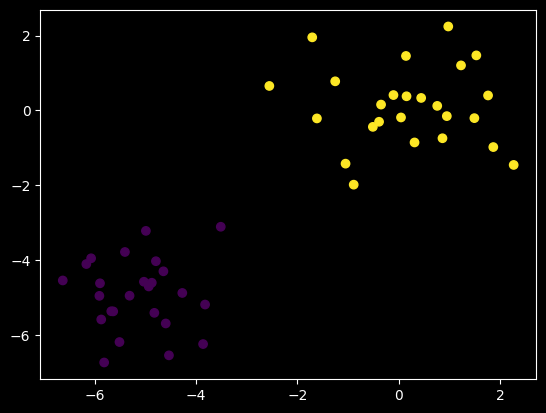

In [127]:
plt.scatter(X[:, 0], X[:, 1], c=labels)

Now pick some weights that affect the input to change the output.

In [128]:
w = np.random.randn(2,1)
w

array([[ 1.8831507 ],
       [-1.34775906]])

And based on the perception algorithm output I can classify if given point is a 1 or a 0.

In [129]:
def model(x, w):
	# x is shaped (N, d)
	# w is shaped (d, 1)
	return np.sign(x@w)

In [130]:
model(X, w)

array([[ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.]])

I can either plot all possible points as the boundary, or I can solve for the decision boundary as a line. I think in the future being able to color all of them will be nice, so I'll just use that method since I've got the ocmpute

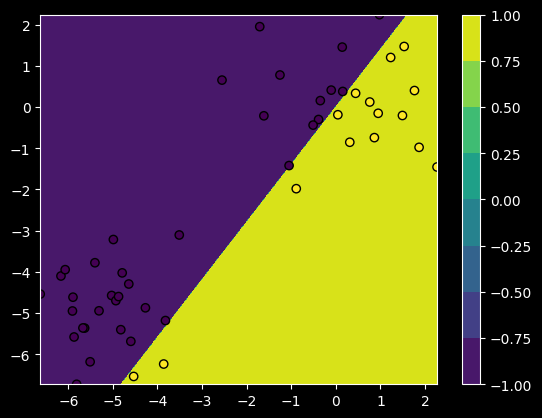

In [133]:
def plot_guess(X):
    minX = X.min(0)
    maxX = X.max(0)
    num_guesses_dim = 500
    x0, x1 = np.meshgrid(
        np.linspace(minX[0], maxX[0], num_guesses_dim),
        np.linspace(minX[1], maxX[1], num_guesses_dim)
    )
    _X = np.array([x0, x1]) # (2, d, d)
    _X = _X.transpose([1,2,0]) # (d, d, 2)
    _X = _X.reshape(-1, 2) # (d*d, 2)

    guesses = model(_X, w) # (d*d, 1)
    guesses = guesses.reshape((num_guesses_dim, num_guesses_dim)) # (d,d)
    plt.contourf(x0, x1, guesses)
    plt.colorbar()

    # then just plot the train points too to see how we match
    plt.scatter(X[:, 0], X[:, 1], edgecolors="black", c=model(X, w))

plot_guess(X)